# Customer Sales Analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("sales_data_sample.csv", encoding='Latin-1')
df

,ORDER_NUMBER,QUANTITY_ORDERED,PRICE_EACH,ORDER_LINE_NUMBER,SALES,ORDER_DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,COUNTRY,TERRITORY,CONTACT_LAST_NAME,CONTACT_FIRST_NAME,DEAL_SIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12-02-2004 00:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03-01-2005 00:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


- <p style="color:purple">The first column I'm seeing here that needs to be converted to a right format is 
    <b style="color:green">ORDER_DATE</b>. In Pandas, we have a 
    <b style="color:green">to_datetime()</b> method which we can use to convert each date string to a datetime object.
</p>

- <p style="color:purple">If I try to convert it directly, 
    <b style="color:green">pd.to_datetime()</b> function will return
    <b style="color:green">NaT (Not a Time)</b>. The mixed formats in our dataset can cause issues with automatic parsing.
</p>

### For Instance,

In [3]:
data = ['2/24/2003 0:00', '05-07-2003', '07-01-2003', '8/25/2003 0:00', 
        '10-10-2003', '10/28/2003 0:00', '11-11-2003', '11/18/2003 0:00', '12-01-2003']

sample_DF = pd.DataFrame(data, columns=['ORDER_DATE'])

sample_DF['ORDER_DATE'] = pd.to_datetime(sample_DF['ORDER_DATE'], errors='coerce')
sample_DF['ORDER_DATE'] = sample_DF['ORDER_DATE'].dt.strftime('%m-%d-%Y')

sample_DF

,ORDER_DATE
0,02-24-2003
1,NaN
2,NaN
3,08-25-2003
4,NaN
5,10-28-2003
6,NaN
7,11-18-2003
8,NaN


- <p style="color:purple">To address this, we will specify the format more explicitly and preprocess the date strings to ensure they are compatible before conversion.
</p>

In [4]:
def standardize_date(date_str):
    try:
        return pd.to_datetime(date_str).strftime('%m-%d-%Y')
    except ValueError:
        return None
    
df['ORDER_DATE'] = df['ORDER_DATE'].apply(standardize_date)
df

,ORDER_NUMBER,QUANTITY_ORDERED,PRICE_EACH,ORDER_LINE_NUMBER,SALES,ORDER_DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,COUNTRY,TERRITORY,CONTACT_LAST_NAME,CONTACT_FIRST_NAME,DEAL_SIZE
0,10107,30,95.70,2,2871.00,02-24-2003,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,08-25-2003,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12-02-2004,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,01-31-2005,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03-01-2005,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,03-28-2005,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


- <p style="color:purple">First, we try to parse the date with common formats. The
    <b style="color:green">standardize_date()</b> function will catch any 
    <b style="color:green">ValueError</b>. If the date cannot be parsed, it returns
    <b style="color:green">None</b> in those cases.
</p>

In [5]:
df = df.drop(columns=['ADDRESS_LINE2'])

## Analyzing Data

In [6]:
df

,ORDER_NUMBER,QUANTITY_ORDERED,PRICE_EACH,ORDER_LINE_NUMBER,SALES,ORDER_DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESS_LINE1,CITY,STATE,POSTAL_CODE,COUNTRY,TERRITORY,CONTACT_LAST_NAME,CONTACT_FIRST_NAME,DEAL_SIZE
0,10107,30,95.70,2,2871.00,02-24-2003,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,08-25-2003,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12-02-2004,Shipped,4,12,2004,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,01-31-2005,Shipped,1,1,2005,...,981-443655,Torikatu 38,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03-01-2005,Resolved,1,3,2005,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,03-28-2005,Shipped,1,3,2005,...,61.77.6555,1 rue Alsace-Lorraine,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


### <b style="color:purple; font-size:17px;">Find total sales per product.</b>

In [7]:
total_sales_per_product = df.groupby('PRODUCT_LINE')['SALES'].sum()
total_sales_per_product

PRODUCT_LINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64

### <b style="color:purple; font-size:17px;">Find top-selling products.</b>

In [8]:
# Finding the top-selling product
top_selling_product = total_sales_per_product.idxmax()
top_selling_product

'Classic Cars'

In [9]:
# Finding the top 3 most-selling products
top_selling_products = total_sales_per_product.sort_values(ascending=False).head(3)
top_selling_products

PRODUCT_LINE
Classic Cars    3919615.66
Vintage Cars    1903150.84
Motorcycles     1166388.34
Name: SALES, dtype: float64

### <b style="color:purple; font-size:17px">Analyze sales trends over time (monthly/quarterly).</b>

In [10]:
monthly_sales_over_time = df.groupby('MONTH_ID')['SALES'].sum()
monthly_sales_over_time

MONTH_ID
1      785874.44
2      810441.90
3      754501.39
4      669390.96
5      923972.56
6      454756.78
7      514875.97
8      659310.57
9      584724.27
10    1121215.22
11    2118885.67
12     634679.12
Name: SALES, dtype: float64

In [11]:
monthly_sales_over_time.sort_values(ascending=False).head(3)

MONTH_ID
11    2118885.67
10    1121215.22
5      923972.56
Name: SALES, dtype: float64

In [12]:
QTRly_sales_over_time = df.groupby('QTR_ID')['SALES'].sum()
QTRly_sales_over_time

QTR_ID
1    2350817.73
2    2048120.30
3    1758910.81
4    3874780.01
Name: SALES, dtype: float64

In [13]:
QTRly_sales_over_time.sort_values(ascending=False)

QTR_ID
4    3874780.01
1    2350817.73
2    2048120.30
3    1758910.81
Name: SALES, dtype: float64

### <b style="color:purple; font-size:17px">Find the average order value per customer.</b>

In [14]:
avg_order_per_customer = df.groupby('CONTACT_FIRST_NAME')['QUANTITY_ORDERED'].mean()
avg_order_per_customer

CONTACT_FIRST_NAME
Adrian     34.804348
Akiko      35.937500
Allen      33.125000
Ann        36.038462
Anna       31.934783
             ...    
Violeta    34.730769
Wendy      34.333333
William    43.142857
Wing C     32.571429
Yoshi      31.954545
Name: QUANTITY_ORDERED, Length: 72, dtype: float64

## Advanced Analysis

### <b style="color:purple; font-size:17px">Sales Trends over Time</b>

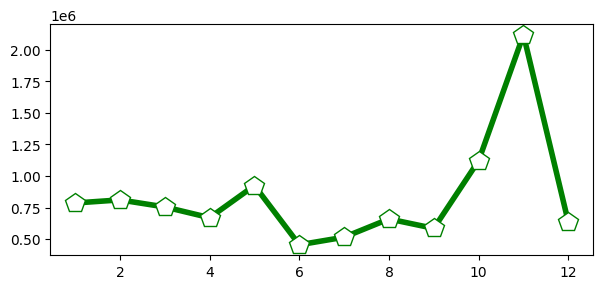

In [15]:
plt.figure(figsize=(7, 3))
plt.plot(monthly_sales_over_time.index, monthly_sales_over_time.values, 
         'p-g', ms = 15, mfc = 'w', lw = 4)
plt.show()

### <b style="color:purple; font-size:17px">Top 5 Products by Total Sales</b>

In [16]:
total_sales_per_product

PRODUCT_LINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64

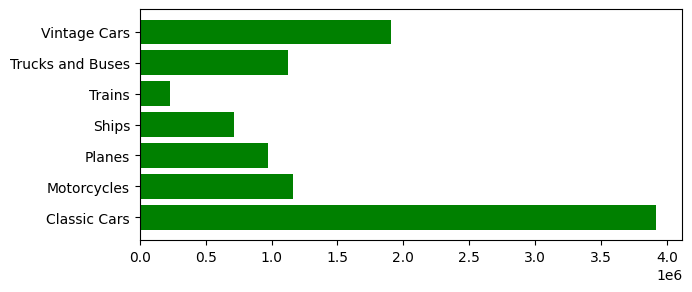

In [17]:
# Total Sales per Product
plt.figure(figsize=(7, 3))
plt.barh(total_sales_per_product.index, total_sales_per_product.values, color='g')
plt.show()

In [18]:
# Top 5 Products by Total Sales
top_products_by_sales = total_sales_per_product.sort_values(ascending=False).head()
top_products_by_sales

PRODUCT_LINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Name: SALES, dtype: float64

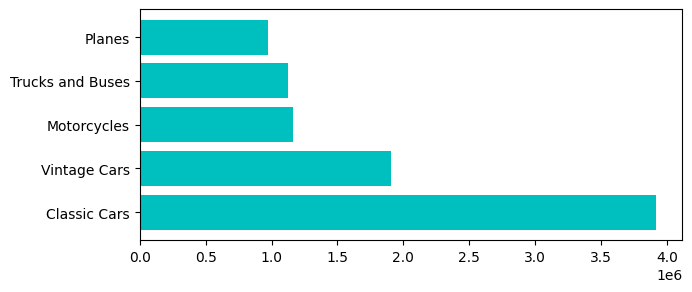

In [19]:
plt.figure(figsize=(7, 3))
plt.barh(top_products_by_sales.index, top_products_by_sales.values, color='c')
plt.show()

### <b style="color:purple; font-size:17px">Total Revenue per Month</b>

In [20]:
df['TOTAL_REVENUE'] = df['QUANTITY_ORDERED'] * df['PRICE_EACH']
df

,ORDER_NUMBER,QUANTITY_ORDERED,PRICE_EACH,ORDER_LINE_NUMBER,SALES,ORDER_DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESS_LINE1,CITY,STATE,POSTAL_CODE,COUNTRY,TERRITORY,CONTACT_LAST_NAME,CONTACT_FIRST_NAME,DEAL_SIZE,TOTAL_REVENUE
0,10107,30,95.70,2,2871.00,02-24-2003,Shipped,1,2,2003,...,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2871.00
1,10121,34,81.35,5,2765.90,05-07-2003,Shipped,2,5,2003,...,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2765.90
2,10134,41,94.74,2,3884.34,07-01-2003,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34
3,10145,45,83.26,6,3746.70,08-25-2003,Shipped,3,8,2003,...,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,3746.70
4,10159,49,100.00,14,5205.27,10-10-2003,Shipped,4,10,2003,...,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,4900.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12-02-2004,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,2000.00
2819,10373,29,100.00,1,3978.51,01-31-2005,Shipped,1,1,2005,...,Torikatu 38,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,2900.00
2820,10386,43,100.00,4,5417.57,03-01-2005,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,4300.00
2821,10397,34,62.24,1,2116.16,03-28-2005,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,2116.16


In [21]:
total_revenue_per_month = df.groupby('MONTH_ID')['TOTAL_REVENUE'].sum()
total_revenue_per_month

MONTH_ID
1      659582.29
2      668328.15
3      626186.73
4      560334.46
5      756812.91
6      384743.59
7      420973.34
8      552132.91
9      474900.12
10     919036.70
11    1744682.45
12     523173.14
Name: TOTAL_REVENUE, dtype: float64

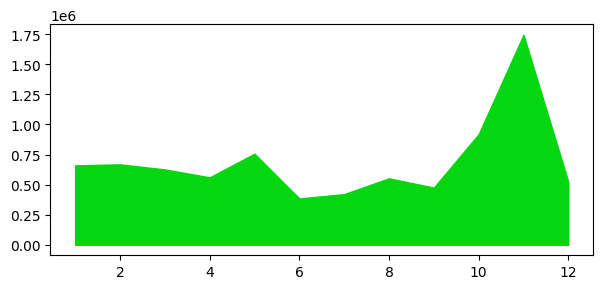

In [22]:
plt.figure(figsize=(7, 3))
plt.fill_between(total_revenue_per_month.index, total_revenue_per_month.values, color='#04d60f')
plt.show()

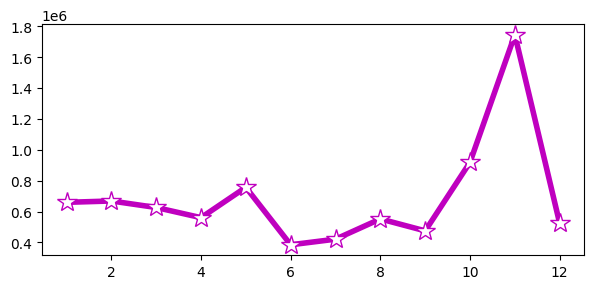

In [23]:
plt.figure(figsize=(7, 3))
plt.plot(total_revenue_per_month.index, total_revenue_per_month.values,
        '*-m', ms = 15, mfc = 'w', lw = 4)
plt.show()